In [1]:
import shap
import pickle
from transformers import AutoTokenizer
import numpy as np
from src.utils import format_fts_for_plotting
import transformers
import shap
from src.plot_text import text


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Single text column

In [2]:
with open("../shap_vals_ensemble_75.pkl", "rb") as f:
    pkl_shap_vals = pickle.load(f)

In [4]:
idx = 0
linebreak_after_idxs = pkl_shap_vals.data.shape[1] - 1


num_tab_fts = 7
formatted_data = np.array(
    format_fts_for_plotting(
        pkl_shap_vals[0].feature_names, pkl_shap_vals[idx].data[:num_tab_fts]
    )
)
text(
    shap.Explanation(
        values=pkl_shap_vals[idx].values,
        base_values=pkl_shap_vals[idx].base_values,
        data=formatted_data,
        # clustering=pkl_shap_vals.clustering[idx],
        output_names=["Genre is not Drama", "Genre is Drama"],
        # hierarchical_values=pkl_shap_vals[idx].hierarchical_values,
    ),
    linebreak_after_idxs=[num_tab_fts],  # linebreak_after_idx,
    text_cols=["Description"],
)

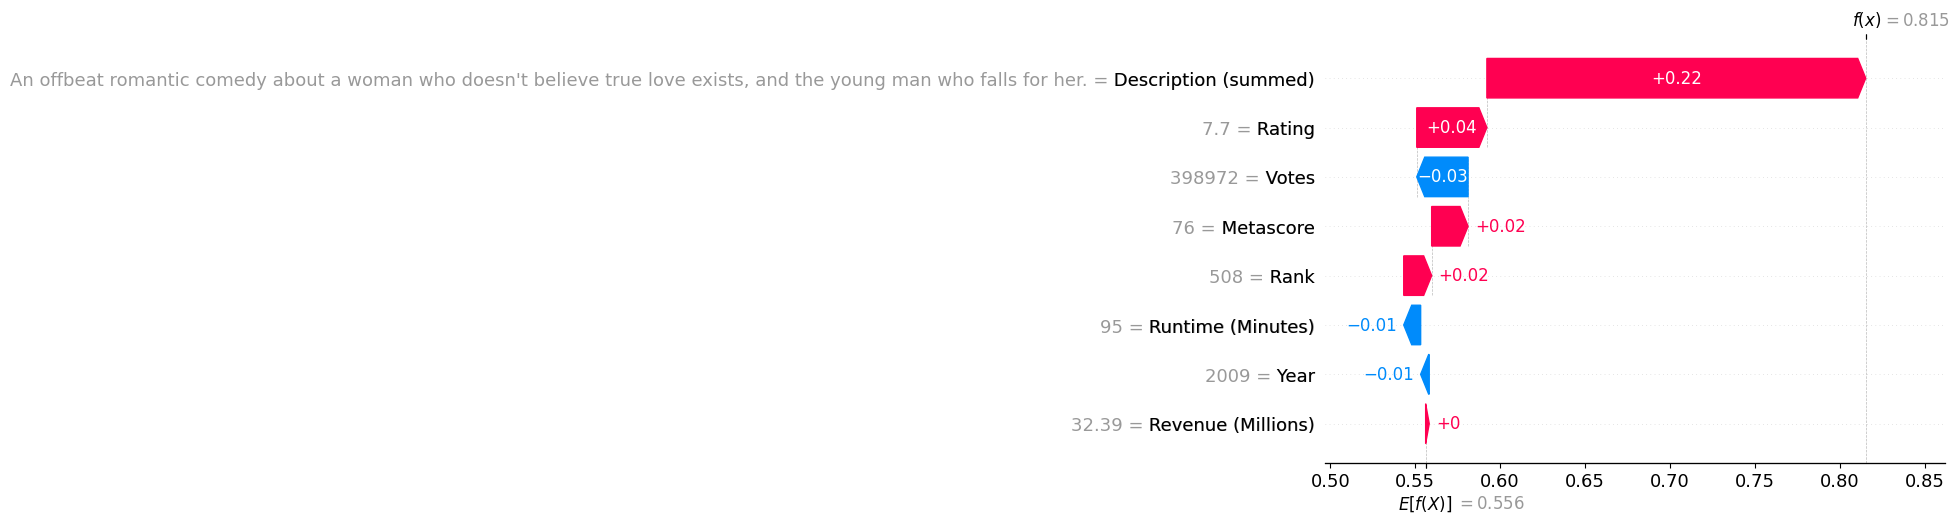

In [5]:
label = 1

shap.waterfall_plot(
    shap.Explanation(
        values=np.append(
            pkl_shap_vals[idx, :num_tab_fts, label].values,
            np.sum(pkl_shap_vals[idx, num_tab_fts:, label].values),
        ),
        base_values=pkl_shap_vals[idx, :, label].base_values,
        data=pkl_shap_vals[idx, :, label].data,
        feature_names=pkl_shap_vals[idx, :num_tab_fts, label].feature_names
        + ["Description (summed)"],
    )
)

## Multiple text columns

Note that this is an untrained distilbert model, so the values themselves are not meaningful. This is just to show how the plot functions can work with multiple text columns.

In [6]:
from src.run_shap import run_shap_multiple_text

for model_type in [
    # "ensemble_50",
    # "ensemble_75",
    # "ensemble_25",
    # "stack",
    "all_text",
]:
    shap_vals = run_shap_multiple_text(model_type)


Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be u

In [7]:
from src.utils import text_ft_index_ends


In [8]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
num_tab_fts = 7
text_idxs = text_ft_index_ends(
    text_fts=shap_vals.data[0][num_tab_fts:], tokenizer=tokenizer
)
linebreak_after_idxs = [num_tab_fts] + [x + num_tab_fts for x in text_idxs]
text_cols = ["Description", "Title"]

In [9]:
from src.plot_text import text

idx = 0


num_tab_fts = 7
formatted_data = np.array(
    format_fts_for_plotting(
        shap_vals[0].feature_names, shap_vals[idx].data[:num_tab_fts]
    )
)
text(
    shap.Explanation(
        values=shap_vals[idx].values,
        base_values=shap_vals[idx].base_values,
        data=formatted_data,
        # clustering=pkl_shap_vals.clustering[idx],
        output_names=["Genre is not Drama", "Genre is Drama"],
        # hierarchical_values=pkl_shap_vals[idx].hierarchical_values,
    ),
    linebreak_after_idxs=linebreak_after_idxs,  # linebreak_after_idx,
    text_cols=text_cols,
)

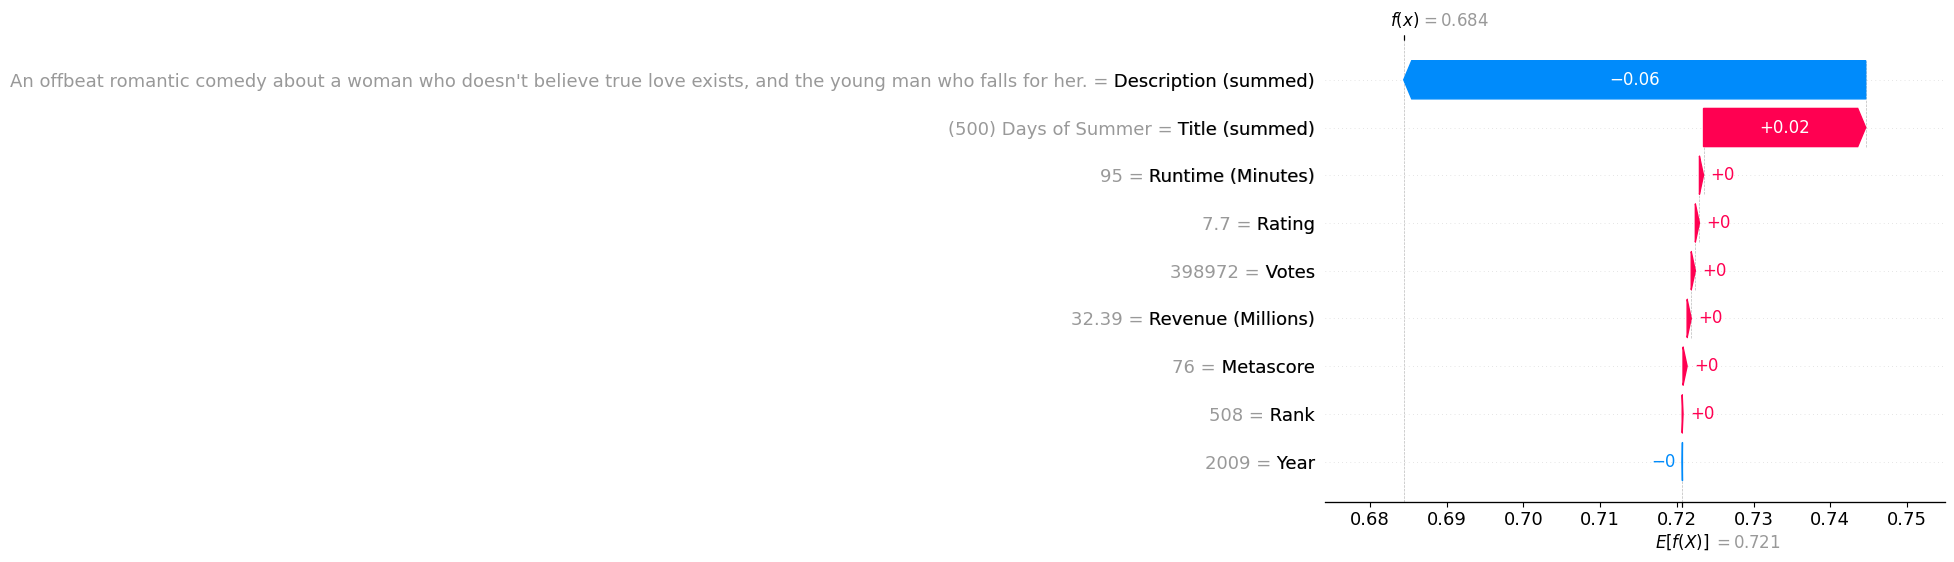

In [20]:
label = 1

shap.waterfall_plot(
    shap.Explanation(
        values=np.append(
            shap_vals[idx, :num_tab_fts, label].values,
            [
                np.sum(
                    shap_vals[idx, num_tab_fts : linebreak_after_idxs[1], label].values
                ),
                np.sum(shap_vals[idx, linebreak_after_idxs[1] :, label].values),
            ],
        ),
        base_values=shap_vals[idx, :, label].base_values,
        data=shap_vals[idx, :, label].data,
        feature_names=shap_vals[idx, :num_tab_fts, label].feature_names
        + ["Description (summed)"]
        + ["Title (summed)"],
    )
)

In [11]:
linebreak_after_idxs

[7, 34]

In [13]:
np.sum(shap_vals[idx, linebreak_after_idxs[1]:, label].values)

0.021142506599426264

In [19]:
np.append(
    shap_vals[idx, :num_tab_fts, label].values,
    [
        np.sum(shap_vals[idx, num_tab_fts : linebreak_after_idxs[1], label].values),
        np.sum(shap_vals[idx, linebreak_after_idxs[1] :, label].values),
    ],
)

array([-3.14183533e-05,  5.34493849e-04,  5.34493849e-04,  5.34493849e-04,
        5.34493849e-04,  5.34493849e-04,  1.08699128e-04, -6.02233142e-02,
        2.11425066e-02])

In [15]:
shap_vals[idx, :num_tab_fts, label].values

array([-3.14183533e-05,  5.34493849e-04,  5.34493849e-04,  5.34493849e-04,
        5.34493849e-04,  5.34493849e-04,  1.08699128e-04])

In [16]:
np.sum(shap_vals[idx, num_tab_fts: linebreak_after_idxs[1], label].values)

-0.060223314166069054

In [17]:
np.sum(shap_vals[idx, linebreak_after_idxs[1]:, label].values)

0.021142506599426264